In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
from mpl_toolkits.mplot3d import Axes3D  # Add this import

### Define Wigner function (i.e. Gaussian State)

In [7]:
def Wigner_function(r, r_bar, sigma, n=1):
    # Calculate the Wigner function for a Gaussian state
    # r: phase space vector (2n-dimensional)
    # r_bar: displacement vector (2n-dimensional)
    # sigma: covariance matrix (2n x 2n)
    # n: number of modes (default is 1 for single mode)

    d = r - r_bar  # Displacement in phase space
    W = 1/(2*np.pi)**n
    W /= np.sqrt(np.linalg.det(sigma))
    W *= np.exp(-0.5 * d.T @ np.linalg.inv(sigma) @ d)
    return W

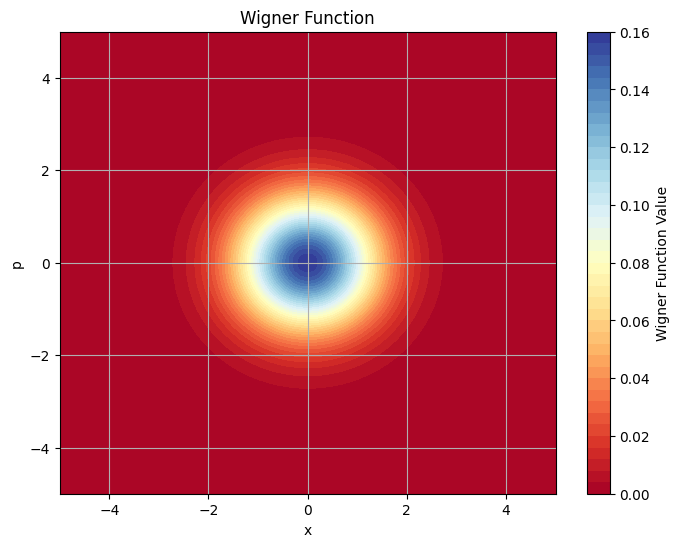

In [ ]:
def plot_wigner_function(r_bar=np.array([0, 0]), sigma=np.eye(2), n=1):
    # Generate a grid in phase space
    xL = np.linspace(-5, 5, 100)
    yL = np.linspace(-5, 5, 100)
    rL = [np.array([xL[i],yL[j]]) for i in range(len(xL)) for j in range(len(yL))]

    WL = [Wigner_function(r, r_bar, sigma, n) for r in rL]

    plt.figure(figsize=(8, 6))
    plt.contourf(xL, yL, np.array(WL).reshape(len(xL), len(yL)), levels=50, cmap='RdYlBu')
    plt.colorbar(label='Wigner Function Value')
    plt.title('Wigner Function')
    plt.xlabel('x')
    plt.ylabel('p')
    plt.grid()
    plt.show()

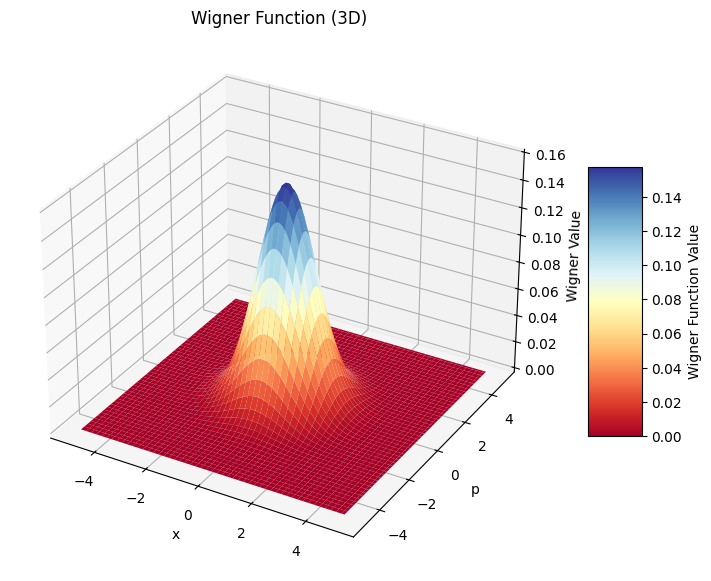

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Add this import

def plot_wigner_function_3D(r_bar=np.array([0, 0]), sigma=np.eye(2), n=1):
    # Generate a grid in phase space
    xL = np.linspace(-5, 5, 100)
    yL = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(xL, yL)
    WL = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            r = np.array([X[i, j], Y[i, j]])
            WL[i, j] = Wigner_function(r, r_bar, sigma, n)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, WL, cmap='RdYlBu', edgecolor='none')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Wigner Function Value')
    ax.set_title('Wigner Function (3D)')
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.set_zlabel('Wigner Value')
    plt.show()

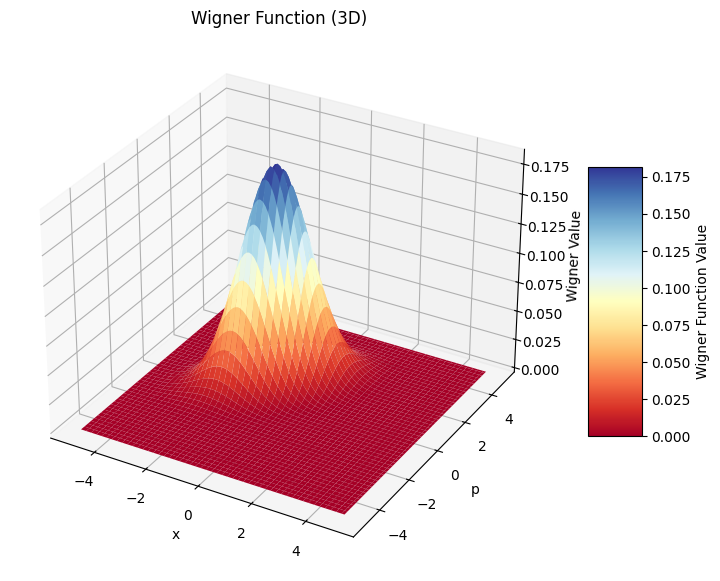

In [ ]:
plot_wigner_function()  # Example usage with default parameters
plot_wigner_function_3D()  # Example usage with default parameters
plot_wigner_function_3D(r_bar=np.array([-1, 1]), sigma=np.array([[1, 0.5], [0.5, 1]]))